In [36]:
import matplotlib.pyplot as plt

from superfv import EulerSolver, plot_1d_slice, initial_conditions

*a priori* solution. The $P$ profile has strange artifacts and adaptive time-stepping doesn't work.

In [ ]:
N = 64
T = 1

sim1 = EulerSolver(
    ic=lambda idx, x, y, z, t, xp: initial_conditions.sinus(
        idx,
        x,
        y,
        z,
        t,
        vx=1,
        bounds=(1e-5, 1),
        P=1e-5,
        xp=xp,
    ),
    nx=N,
    riemann_solver="hllc",
    p=1,
    flux_recipe=2,
    MUSCL=True,
    MUSCL_limiter=None,
    SED=False,
)

sim2 = EulerSolver(
    ic=lambda idx, x, y, z, t, xp: initial_conditions.sinus(
        idx,
        x,
        y,
        z,
        t,
        vx=1,
        bounds=(1e-5, 1),
        P=1e-5,
        xp=xp,
    ),
    nx=N,
    riemann_solver="hllc",
    p=1,
    flux_recipe=2,
    CFL=0.5,
)

TypeError: sinus() got an unexpected keyword argument 'CFL'

In [ ]:
sim1.musclhancock(T)
sim2.run(T)

Step #102 @ t=1.00e+00 | dt=7.94e-03 | min(rho)=7.06e-04, min(P)=1.00e-05 | (done)                  
Step #99 @ t=1.00e+00 | dt=2.59e-03 | min(rho)=6.71e-04, min(P)=1.00e-05 | (done)                   


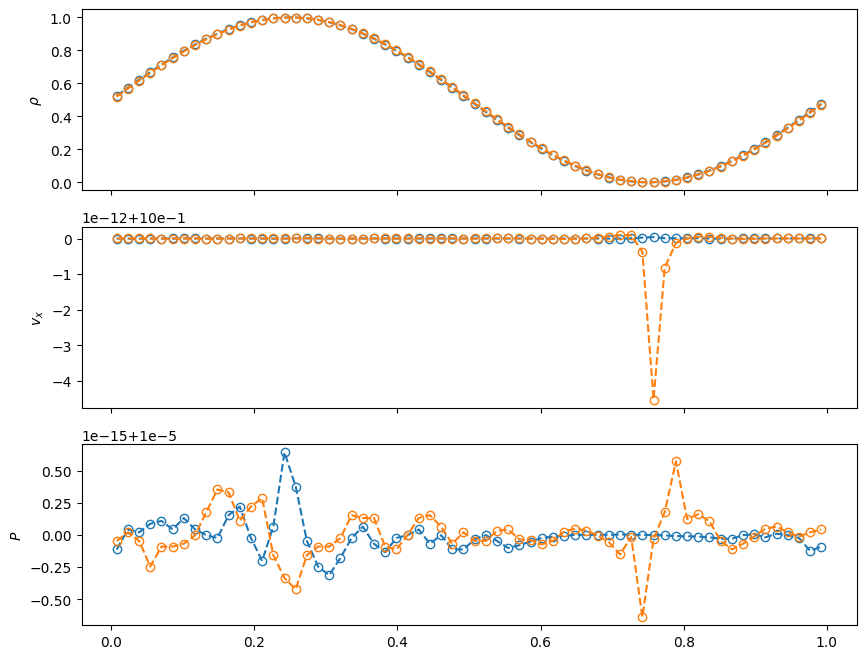

In [ ]:
fig, axs = plt.subplots(3, 1, sharex=True, sharey="row", figsize=(10, 8))

axs[0].set_ylabel(r"$\rho$")
axs[1].set_ylabel(r"$v_x$")
axs[2].set_ylabel(r"$P$")

style = dict(marker="o", mfc="none", linestyle="--")
plot_1d_slice(sim1, axs[0], "rho", **style)
plot_1d_slice(sim2, axs[0], "rho", **style)

plot_1d_slice(sim1, axs[1], "vx", **style)
plot_1d_slice(sim2, axs[1], "vx", **style)

plot_1d_slice(sim1, axs[2], "P", **style)
plot_1d_slice(sim2, axs[2], "P", **style)